<div class="markdown-google-sans">

# **The Fabrics Dataset**



## **1. Define problem**


<div class="markdown-google-sans">


The Fabrics Dataset consists of about 2000 samples of garments and fabrics. A small patch of each surface has been captured under 4 different illumination conditions using a custom made, portable photometric stereo sensor. All images have been acquired "in the field" (at clothes shops) and the dataset reflects the distribution of fabrics in real world, hence it is not balanced. The majority of clothes are made of specific fabrics, such as cotton and polyester, while some other fabrics, such as silk and linen, are more rare. Also, a large number of clothes are not composed of a single fabric but two or more fabrics are used to give the garment the desired properties (blended fabrics). For every garment we kept information (attributes) about its material composition from the manufacturer label and its type (pants, shirt, skirt etc.).

https://ibug.doc.ic.ac.uk/resources/fabrics/

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##**2. Prepare Problem**


### **2.1. Load Libraries**

In [ ]:
from IPython.display import display, FileLink
from tensorflow.keras.datasets import cifar10, cifar100
from tensorflow.keras import utils, layers, backend as K, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, SpatialDropout2D, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, Callback, ModelCheckpoint, TensorBoard

import tensorflow as tf
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

from IPython.display import FileLink
from IPython import display
import pandas as pd

from sklearn.metrics import classification_report
import cv2

from PIL import Image
import os
import shutil
from pathlib import Path

import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model



In [ ]:
#Khai báo thư viện
import os
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cur_dir = "/content/drive/MyDrive/Gr3_Fabric_Classification"
INPUT_DATA = f"{cur_dir}/data/Fabrics"


### **2.2. Load Dataset**

In [ ]:
# Extracting file input directory and labels
input_filepaths = []
input_labels = []

for index, fabric in enumerate(os.listdir(INPUT_DATA)):
    print("In folder {} \n".format(fabric))
    for fabric_type in os.listdir(os.path.join(INPUT_DATA, fabric)):
        for fabric_img in os.listdir(os.path.join(INPUT_DATA, fabric, fabric_type)):
            if Path(fabric_img).suffix == '.png':
                src_image = os.path.join(INPUT_DATA, fabric, fabric_type, fabric_img)
                input_filepaths.append(src_image)
                input_labels.append(fabric)

In folder Wool 

In folder Silk 

In folder Terrycloth 

In folder Polyester 

In folder Denim 

In folder Leather 

In folder Viscose 

In folder Unclassified 

In folder Linen 

In folder Nylon 

In folder Fur 

In folder Satin 

In folder Fleece 

In folder Lut 

In folder Felt 

In folder Crepe 

In folder Velvet 

In folder Suede 

In folder Utilities 

In folder Acrylic 

In folder Artificial_fur 

In folder Artificial_leather 

In folder Blended 

In folder Chenille 

In folder Corduroy 

In folder Cotton 



## **3. Exploratory Data Analyst - EDA**

In [ ]:
data_df = pd.DataFrame(list(zip(input_filepaths, input_labels)), columns =['Filepath', 'Label'])
data_df

,Filepath,Label
0,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Wool
1,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Wool
2,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Wool
3,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Wool
4,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Wool
...,...,...
7876,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Cotton
7877,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Cotton
7878,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Cotton
7879,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Cotton


In [ ]:

values, counts = np.unique(input_labels, return_counts=True)

class_distribution_df = pd.DataFrame({
    'Class': values,
    'Frequency': counts
})

class_distribution_df = class_distribution_df.sort_values('Frequency', ascending=False)

print("Class distribution info:\n")
print(class_distribution_df.info())
print("\nClass distribution details:\n")
print(class_distribution_df)


Class distribution info:

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 6 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Class      25 non-null     object
 1   Frequency  25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 600.0+ bytes
None

Class distribution details:

                 Class  Frequency
6               Cotton       2352
3              Blended       1645
15           Polyester        904
8                Denim        648
20        Unclassified        492
24                Wool        360
14               Nylon        228
17                Silk        200
23             Viscose        148
10              Fleece        132
19          Terrycloth        120
7                Crepe        104
5             Corduroy         96
16               Satin         96
12               Linen         76
11             Leather         64
4             Chenille         52
0              Acry

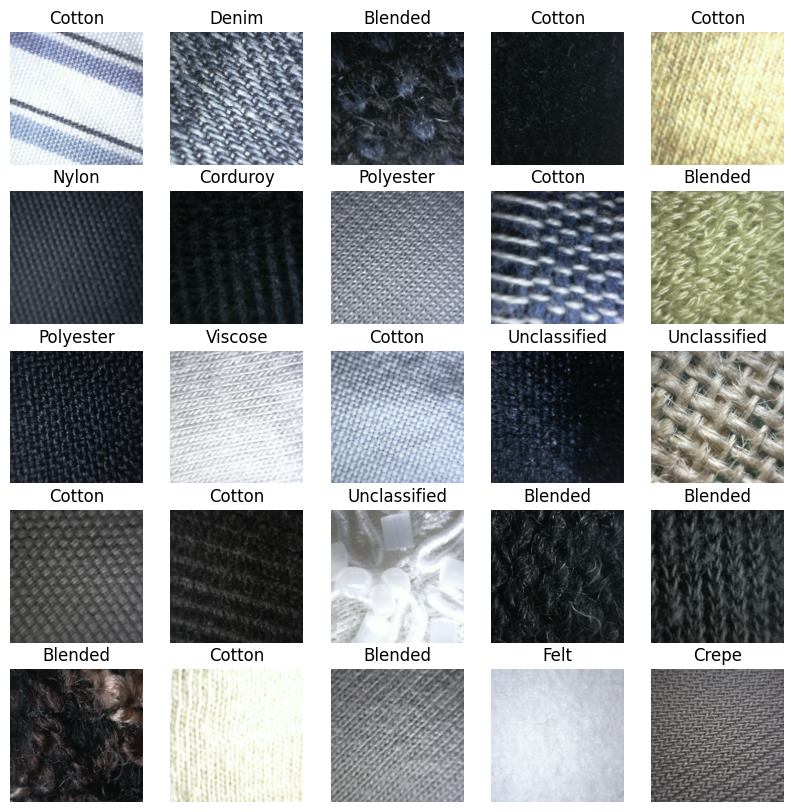

In [ ]:
random_index = np.random.randint(0, len(data_df), 25)
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    ax.imshow(plt.imread(data_df.Filepath[random_index[i]]))
    ax.set_title(data_df.Label[random_index[i]])
    plt.axis('off')
plt.show()

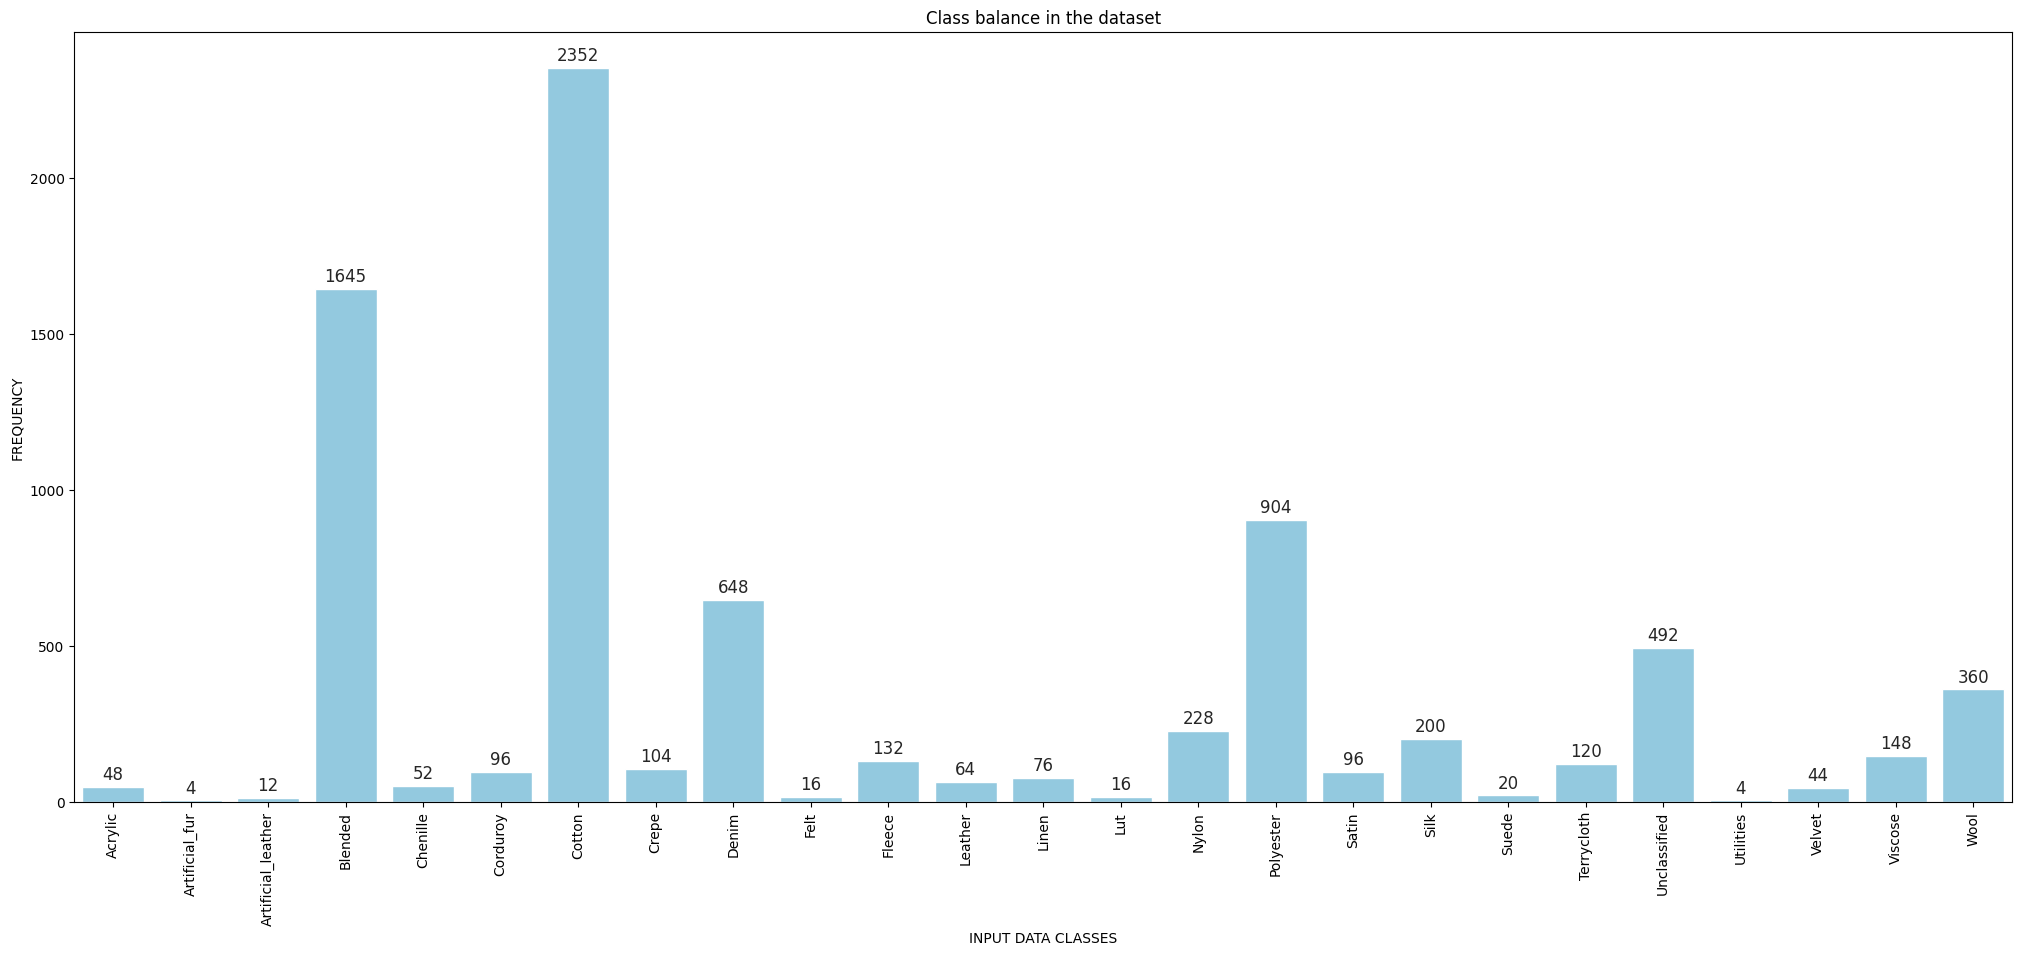

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
values, counts = np.unique(input_labels, return_counts=True)
sns.set_theme()

ax = sns.barplot(x=values, y=counts, color='skyblue')

ax.set_title("Class balance in the dataset")
ax.set_xlabel("INPUT DATA CLASSES")
ax.set_ylabel("FREQUENCY")

# Annotate the bar heights
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.0f'),
                (g.get_x() + g.get_width() / 2., g.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points')

plt.xticks(rotation=90)
plt.show()


<div class="markdown-google-sans">

**Comments:**

---

- **Class imbalance**: There is a significant disparity in the number of samples between classes. Some classes like **"Blended"** (1,645 samples), **"Cotton"** (2,352 samples), and **"Polyester"** (904 samples) have a large number of samples, while others, such as **"Artificial_fur", "Utilities,"** and **"Suede"**, only have a few samples (4-20 samples). This indicates that the data is imbalanced, with some classes severely lacking samples.

- Since "Blended" fabric is a mix of different types of fabrics, it will be removed from the dataset so that the model can focus on learning from fabrics where one type constitutes more than 95% of a product.


- The "Unclassified" class accounts for a significant portion of the data and includes fabric samples that are not clearly categorized. This creates a challenge for the machine learning model due to the heterogeneity, but it also opens up an opportunity to explore new fabric types. This class should be carefully handled to avoid negatively impacting model performance.

→ To ensure the machine learning model performs well across all classes, the next steps should include **balancing the data or using stronger machine learning methods (such as augmentation techniques) to handle the imbalanced data.**

<div class="markdown-google-sans">

**Nhận xét:**


---


- **Mất cân bằng giữa các lớp**: Có sự chênh lệch lớn về số lượng mẫu giữa các lớp. Một số lớp như **"Blended"** (1,645 mẫu), **"Cotton"** (2,352 mẫu), và **"Polyester"** (904 mẫu) có số lượng mẫu rất lớn, trong khi nhiều lớp khác như **"Artificial_fur", "Utilities",** và **"Suede"** chỉ có vài mẫu (4-20 mẫu). Điều này cho thấy dữ liệu không cân bằng, với một số lớp bị thiếu mẫu nghiêm trọng.

- "Blend" là loại vải được tạo thành từ sự pha trộn giữa các loại vải khác nhau nên sẽ bị loại bỏ để mô hình có thể học với các thành phần vải chiếm > 95% trên một sản phẩm.

- Lớp "Unclassified" chiếm số lượng đáng kể trong dữ liệu và bao gồm các mẫu vải chưa được phân loại rõ ràng. Điều này tạo ra thách thức cho mô hình học máy do tính không đồng nhất, nhưng cũng mở ra cơ hội để khám phá các loại vải mới. Cần xử lý lớp này cẩn thận để tránh ảnh hưởng tiêu cực đến hiệu suất mô hình.

 → Để đảm bảo mô hình học máy hoạt động hiệu quả trên tất cả các lớp,phần tiếp theo cần thực hiện một số bước như c**ân bằng dữ liệu, hoặc sử dụng các phương pháp học máy mạnh hơn (như kỹ thuật tăng cường) để xử lý dữ liệu không cân bằng.**









## **4. Preprocessing**

<div class="markdown-google-sans">

### ***4.1. Removing fabrics with very low sample size***


In [ ]:
data_df = data_df.loc[data_df['Label'].isin(["Cotton", "Denim", "Polyester", "Nylon", "Silk", "Wool"])]
data_df = data_df.reset_index(drop=True)
data_df

,Filepath,Label
0,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Wool
1,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Wool
2,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Wool
3,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Wool
4,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Wool
...,...,...
4687,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Cotton
4688,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Cotton
4689,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Cotton
4690,/content/drive/MyDrive/Gr3_Fabric_Classificati...,Cotton


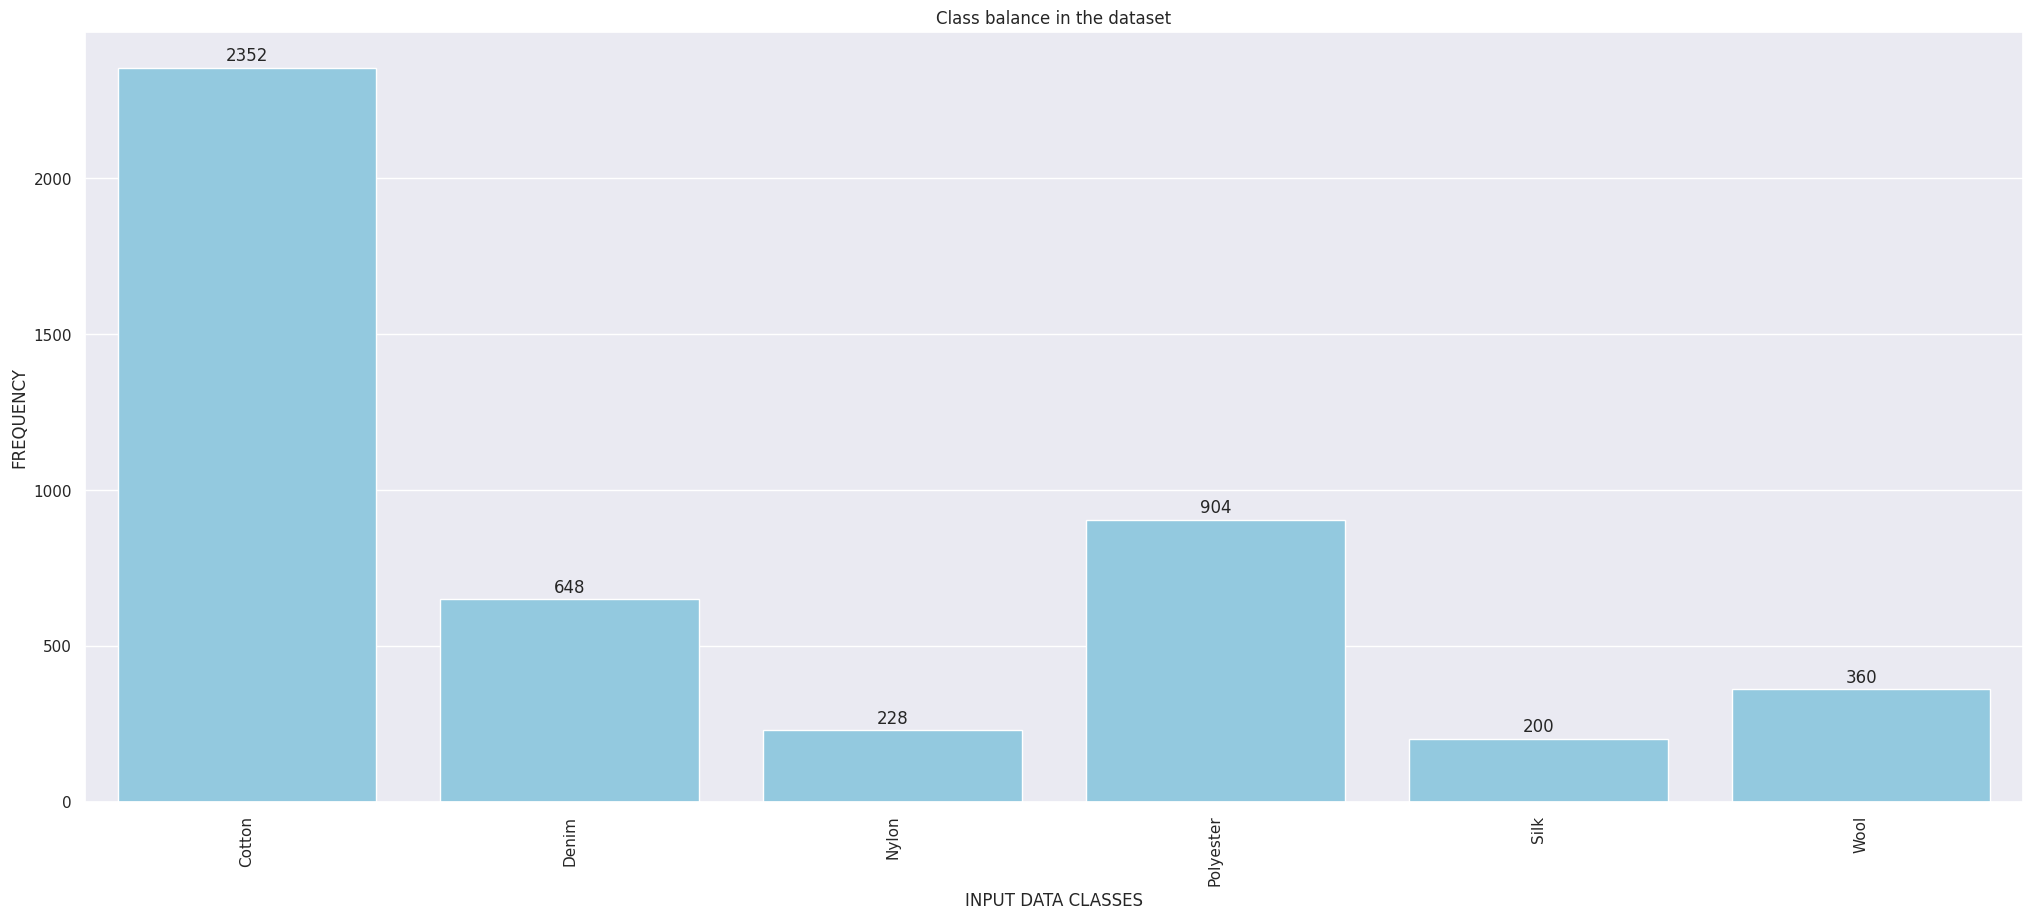

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
values, counts = np.unique(data_df.Label.values.tolist(), return_counts=True)
sns.set_theme()

ax = sns.barplot(x=values, y=counts, color='skyblue')

ax.set_title("Class balance in the dataset")
ax.set_xlabel("INPUT DATA CLASSES")
ax.set_ylabel("FREQUENCY")

# Annotate the bar heights
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.0f'),
                (g.get_x() + g.get_width() / 2., g.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.xticks(rotation=90)
plt.show()


<div class="markdown-google-sans">

### 4.2. Improving the class balance through **Data Augmentation**


Multi Step Augmentation to improve class balance. We perform this augmentation only on the training data, retaining the original fabric samples in the test dataset.



In [ ]:

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data_df, test_size=0.2, stratify=data_df[['Label']], shuffle=True, random_state=42)

print("Train dataframe shape: {}".format(train_df.shape))
print("Test dataframe shape: {}".format(test_df.shape))


In [ ]:

from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df[['Label']], shuffle=True, random_state=42)

print("Train dataframe shape: {}".format(train_df.shape))
print("Validation dataframe shape: {}".format(val_df.shape))

Train dataframe shape: (3002, 2)
Validation dataframe shape: (751, 2)


In [ ]:
import os

# Before saving the dataframes, create the directory if it doesn't exist
os.makedirs(f"{cur_dir}/data/prepare", exist_ok=True)

# Now save the dataframes
train_df.to_csv(f"{cur_dir}/data/prepare/train.csv", index=False)
test_df.to_csv(f"{cur_dir}/data/prepare/test.csv", index=False)
val_df.to_csv(f"{cur_dir}/data/prepare/validation.csv", index=False)

In [ ]:
# prompt: print distribution of train_df

print(train_df['Label'].value_counts())

Label
Cotton       1505
Polyester     578
Denim         414
Wool          230
Nylon         147
Silk          128
Name: count, dtype: int64


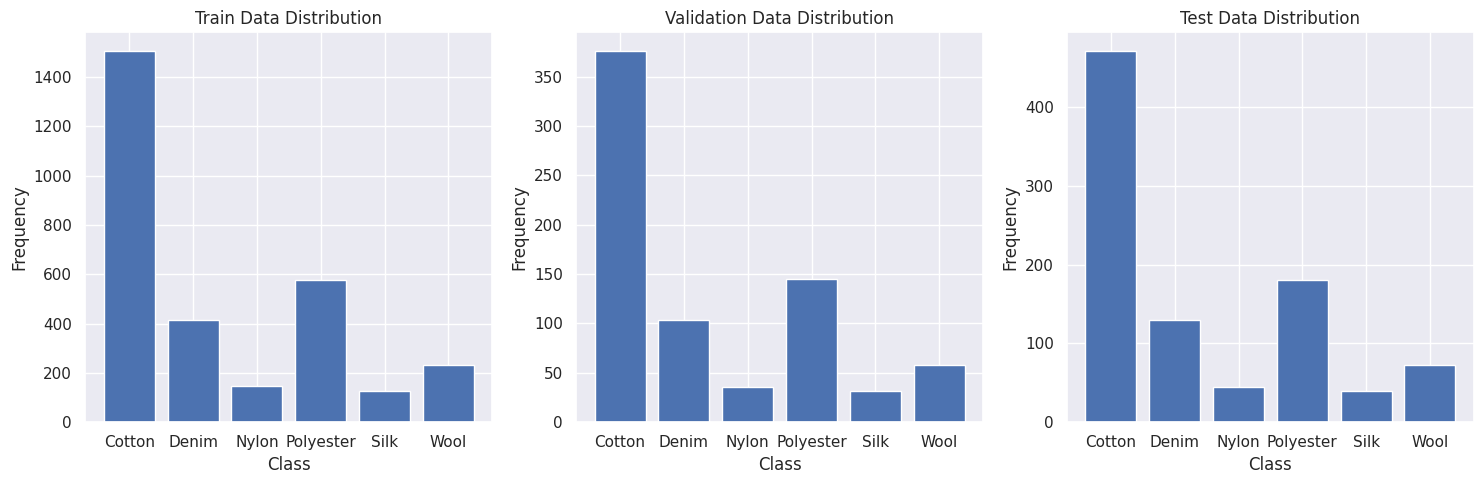

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming train_df, test_df, and val_df are already defined

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the class distribution for train_df
values, counts = np.unique(train_df.Label.values.tolist(), return_counts=True)
axes[0].bar(values, counts)
axes[0].set_title("Train Data Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Frequency")

# Plot the class distribution for val_df
values, counts = np.unique(val_df.Label.values.tolist(), return_counts=True)
axes[1].bar(values, counts)
axes[1].set_title("Validation Data Distribution")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Frequency")

# Plot the class distribution for test_df
values, counts = np.unique(test_df.Label.values.tolist(), return_counts=True)
axes[2].bar(values, counts)
axes[2].set_title("Test Data Distribution")
axes[2].set_xlabel("Class")
axes[2].set_ylabel("Frequency")


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Data augmentation on the training set.








In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Gr3_Fabric_Classification/data/prepare/train.csv')
print(train_df)

                                               Filepath      Label
0     /content/drive/MyDrive/Gr3_Fabric_Classificati...     Cotton
1     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Polyester
2     /content/drive/MyDrive/Gr3_Fabric_Classificati...       Wool
3     /content/drive/MyDrive/Gr3_Fabric_Classificati...      Nylon
4     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Polyester
...                                                 ...        ...
2997  /content/drive/MyDrive/Gr3_Fabric_Classificati...     Cotton
2998  /content/drive/MyDrive/Gr3_Fabric_Classificati...       Wool
2999  /content/drive/MyDrive/Gr3_Fabric_Classificati...  Polyester
3000  /content/drive/MyDrive/Gr3_Fabric_Classificati...     Cotton
3001  /content/drive/MyDrive/Gr3_Fabric_Classificati...     Cotton

[3002 rows x 2 columns]


In [ ]:
# prompt: in ra phân phối của train_df

print(train_df['Label'].value_counts())

Label
Cotton       1505
Polyester     578
Denim         414
Wool          230
Nylon         147
Silk          128
Name: count, dtype: int64


In [ ]:
# Tính toán số lượng label và tìm max label
max_label = train_df['Label'].value_counts().idxmax()
max_count = train_df['Label'].value_counts().max()

In [ ]:
print(max_label)
print(max_count)

Cotton
1505


In [ ]:
# Thiết lập target_count là số lượng mục tiêu cho các nhãn
target_count = max_count

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Thư mục lưu trữ ảnh đã tăng cường
TARGET_DIRECTORY = "/content/drive/MyDrive/Gr3_Fabric_Classification/data/augmented/train_augmented/"
os.makedirs(TARGET_DIRECTORY, exist_ok=True)

# Thiết lập ImageDataGenerator cho các cấp độ tăng cường
datagen_lv1 = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_lv2 = ImageDataGenerator(
    rotation_range=70,
    width_shift_range=0.15,
    height_shift_range=0.25,
    shear_range=0.1,
    zoom_range=0.2,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen_lv3 = ImageDataGenerator(
    rotation_range=10,
    shear_range=0.15,
    zoom_range=[0.5, 1.0],
    brightness_range=[0.2, 1.0],
    vertical_flip=True,
    fill_mode='nearest'
)

In [ ]:

# Hàm đếm số lượng ảnh hiện có
def count_current_images():
    counts = {}
    for label in train_df['Label'].unique():
        label_dir = os.path.join(TARGET_DIRECTORY, label, 'lv1')
        current_count = len(os.listdir(label_dir)) if os.path.exists(label_dir) else 0
        counts[label] = current_count
    return counts

In [ ]:
# Chỉ định danh sách nhãn cần tăng cường
target_labels = ["Denim", "Nylon", "Polyester", "Silk", "Wool"]

In [ ]:
# Tạo ảnh cho lv1
for label in target_labels:
    label_lv1_dir = os.path.join(TARGET_DIRECTORY, label, 'lv1')
    os.makedirs(label_lv1_dir, exist_ok=True)  # Tạo thư mục lv1 nếu chưa tồn tại

    temp_df = train_df[train_df['Label'] == label]
    data_gen_lv1 = datagen_lv1.flow_from_dataframe(
        dataframe=temp_df,
        save_to_dir=label_lv1_dir,
        x_col='Filepath',
        y_col='Label',
        target_size=(400, 400),
        interpolation='bicubic',
        color_mode='rgb',
        class_mode='categorical',
        batch_size=len(temp_df),
        seed=42,
    )

    print(f"Generating {len(temp_df)} augmented images for {label} at lv1")
    next(data_gen_lv1)  # Sinh một batch ảnh và lưu lại

Found 414 validated image filenames belonging to 1 classes.
Generating 414 augmented images for Denim at lv1
Found 147 validated image filenames belonging to 1 classes.
Generating 147 augmented images for Nylon at lv1
Found 578 validated image filenames belonging to 1 classes.
Generating 578 augmented images for Polyester at lv1
Found 128 validated image filenames belonging to 1 classes.
Generating 128 augmented images for Silk at lv1
Found 230 validated image filenames belonging to 1 classes.
Generating 230 augmented images for Wool at lv1


In [ ]:
current_count = count_current_images()
current_count

{'Cotton': 0,
 'Polyester': 578,
 'Wool': 230,
 'Nylon': 147,
 'Denim': 414,
 'Silk': 128}

In [ ]:
for label in target_labels:
    # Tính số lượng cần tạo cho lv2
    total_current = current_count[label] + len(train_df[train_df['Label'] == label])
    needed_lv2 = (target_count - total_current) // 2

    if needed_lv2 > 0:
        # Tạo thư mục cho lv2
        label_lv2_dir = os.path.join(TARGET_DIRECTORY, label, 'lv2')
        os.makedirs(label_lv2_dir, exist_ok=True)

        # Tạo ảnh cho lv2
        print(f"Generating {needed_lv2} augmented images for {label} at lv2")
        data_gen_lv2 = datagen_lv2.flow_from_dataframe(
            dataframe=train_df[train_df['Label'] == label],
            save_to_dir=label_lv2_dir,
            x_col='Filepath',
            y_col='Label',
            target_size=(400, 400),
            interpolation='bicubic',
            color_mode='rgb',
            class_mode='categorical',
            batch_size=1,  # Đặt kích thước batch thành 1
            seed=42,
        )

        generated_count = 0
        while generated_count < needed_lv2:
            # Tạo một batch ảnh
            next_batch = next(data_gen_lv2)
            generated_count += len(next_batch[0])  # Cập nhật bằng số ảnh đã tạo

            # In ra số lượng ảnh đã tạo
            print(f"Generated {generated_count} images for {label} at lv2.")



In [ ]:

# Hàm đếm số lượng ảnh hiện có
def count_current_images():
    counts = {}
    for label in train_df['Label'].unique():
        label_dir = os.path.join(TARGET_DIRECTORY, label, 'lv1')
        current_count = len(os.listdir(label_dir)) if os.path.exists(label_dir) else 0
        counts[label] = current_count
    return counts

In [ ]:
# Hàm đếm số lượng ảnh hiện có
def count_lv2_images():
    lv2_counts = {}
    for label in train_df['Label'].unique():
        label_dir = os.path.join(TARGET_DIRECTORY, label, 'lv2')
        count_2 = len(os.listdir(label_dir)) if os.path.exists(label_dir) else 0
        lv2_counts[label] = count_2
    return lv2_counts

# Gọi hàm để lấy số lượng ảnh ở lv2
lv2_counts = count_lv2_images()

# Kiểm tra kết quả
print("Số lượng ảnh ở lv2 cho mỗi nhãn:")
for label, count in lv2_counts.items():
    print(f"{label}: {count}")


Số lượng ảnh ở lv2 cho mỗi nhãn:
Cotton: 0
Polyester: 174
Wool: 522
Nylon: 605
Denim: 338
Silk: 624


In [ ]:
current_count

{'Cotton': 0,
 'Polyester': 578,
 'Wool': 230,
 'Nylon': 147,
 'Denim': 414,
 'Silk': 128}

In [ ]:
lv2_counts

{'Cotton': 0,
 'Polyester': 174,
 'Wool': 522,
 'Nylon': 605,
 'Denim': 338,
 'Silk': 624}

In [ ]:
for label in target_labels:
    # Tính số lượng cần tạo cho lv2
    total_after_lv2 = current_count[label] + lv2_counts[label] + len(train_df[train_df['Label'] == label])
    needed_lv3 = target_count - total_after_lv2

    if needed_lv3 > 0:
        # Tạo thư mục cho lv2
        label_lv3_dir = os.path.join(TARGET_DIRECTORY, label, 'lv3')
        os.makedirs(label_lv3_dir, exist_ok=True)

        # Tạo ảnh cho lv2
        print(f"Generating {needed_lv3} augmented images for {label} at lv3")
        data_gen_lv3 = datagen_lv3.flow_from_dataframe(
            dataframe=train_df[train_df['Label'] == label],
            save_to_dir=label_lv3_dir,
            x_col='Filepath',
            y_col='Label',
            target_size=(400, 400),
            interpolation='bicubic',
            color_mode='rgb',
            class_mode='categorical',
            batch_size=1,  # Đặt kích thước batch thành 1
            seed=42,
        )

        generated_count = 0
        while generated_count < needed_lv3:
            # Tạo một batch ảnh
            next_batch = next(data_gen_lv3)
            generated_count += len(next_batch[0])  # Cập nhật bằng số ảnh đã tạo

            # In ra số lượng ảnh đã tạo
            print(f"Generated {generated_count} images for {label} at lv3.")



In [ ]:
# prompt: # prompt: duyệt qua thư mục /content/drive/MyDrive/Gr3_Fabric_Classification/data/augmented/train_augmented; tìm số ảnh trong mỗi level

import os

def count_images_in_levels(directory):
  """
  Duyệt qua thư mục và đếm số lượng ảnh trong mỗi level (lv1, lv2, lv3).

  Args:
    directory: Đường dẫn đến thư mục cần duyệt.

  Returns:
    Một dictionary chứa số lượng ảnh trong mỗi level cho từng nhãn.
  """
  image_counts = {}
  for label in os.listdir(directory):
    label_dir = os.path.join(directory, label)
    if os.path.isdir(label_dir):
      image_counts[label] = {}
      for level in ['lv1', 'lv2', 'lv3']:
        level_dir = os.path.join(label_dir, level)
        if os.path.isdir(level_dir):
          image_counts[label][level] = len(os.listdir(level_dir))
        else:
          image_counts[label][level] = 0
  return image_counts


# Đường dẫn đến thư mục chứa ảnh đã tăng cường
augmented_train_dir = "/content/drive/MyDrive/Gr3_Fabric_Classification/data/augmented/train_augmented"

# Đếm số lượng ảnh trong mỗi level
image_counts_by_level = count_images_in_levels(augmented_train_dir)

# In kết quả
for label, level_counts in image_counts_by_level.items():
  print(f"Label: {label}")
  for level, count in level_counts.items():
    print(f"  {level}: {count} images")

Label: Denim
  lv1: 414 images
  lv2: 338 images
  lv3: 339 images
Label: Nylon
  lv1: 147 images
  lv2: 605 images
  lv3: 606 images
Label: Polyester
  lv1: 578 images
  lv2: 174 images
  lv3: 175 images
Label: Silk
  lv1: 128 images
  lv2: 624 images
  lv3: 625 images
Label: Wool
  lv1: 230 images
  lv2: 522 images
  lv3: 523 images


In [ ]:
# prompt: tạo dataframe chứa Filepath và Label trong /content/drive/MyDrive/Gr3_Fabric_Classification/data/augmented/train_augmented

import pandas as pd
import os

def create_dataframe_from_augmented_data(directory):


  filepaths = []
  labels = []

  for label in os.listdir(directory):
    label_dir = os.path.join(directory, label)
    if os.path.isdir(label_dir):
      for level in ['lv1', 'lv2', 'lv3']:
          level_dir = os.path.join(label_dir, level)
          if os.path.isdir(level_dir):
            for filename in os.listdir(level_dir):
              if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                filepaths.append(os.path.join(level_dir, filename))
                labels.append(label)

  df = pd.DataFrame({'Filepath': filepaths, 'Label': labels})
  return df

# Example usage:
directory = '/content/drive/MyDrive/Gr3_Fabric_Classification/data/augmented/train_augmented'
augmented_df = create_dataframe_from_augmented_data(directory)
print(augmented_df)

                                               Filepath  Label
0     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Denim
1     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Denim
2     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Denim
3     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Denim
4     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Denim
...                                                 ...    ...
6023  /content/drive/MyDrive/Gr3_Fabric_Classificati...   Wool
6024  /content/drive/MyDrive/Gr3_Fabric_Classificati...   Wool
6025  /content/drive/MyDrive/Gr3_Fabric_Classificati...   Wool
6026  /content/drive/MyDrive/Gr3_Fabric_Classificati...   Wool
6027  /content/drive/MyDrive/Gr3_Fabric_Classificati...   Wool

[6028 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt
import random

# Choose a random batch of images
num_images_to_display = 9  # Changed to 9 to match the number of subplots
random_indices = random.sample(range(len(augmented_df)), num_images_to_display)

# Create a figure and axes for the subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3 rows, 3 columns

# Iterate through the random indices and display the images
for i, index in enumerate(random_indices):
    row = i // 3
    col = i % 3

    filepath = augmented_df.loc[index, 'Filepath']
    label = augmented_df.loc[index, 'Label']

    image = plt.imread(filepath)
    axes[row, col].imshow(image)
    axes[row, col].set_title(f"Label: {label}")
    axes[row, col].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

combined_df = pd.concat([train_df, augmented_df], ignore_index=True)
print(combined_df)

                                               Filepath      Label
0     /content/drive/MyDrive/Gr3_Fabric_Classificati...     Cotton
1     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Polyester
2     /content/drive/MyDrive/Gr3_Fabric_Classificati...       Wool
3     /content/drive/MyDrive/Gr3_Fabric_Classificati...      Nylon
4     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Polyester
...                                                 ...        ...
9025  /content/drive/MyDrive/Gr3_Fabric_Classificati...       Wool
9026  /content/drive/MyDrive/Gr3_Fabric_Classificati...       Wool
9027  /content/drive/MyDrive/Gr3_Fabric_Classificati...       Wool
9028  /content/drive/MyDrive/Gr3_Fabric_Classificati...       Wool
9029  /content/drive/MyDrive/Gr3_Fabric_Classificati...       Wool

[9030 rows x 2 columns]


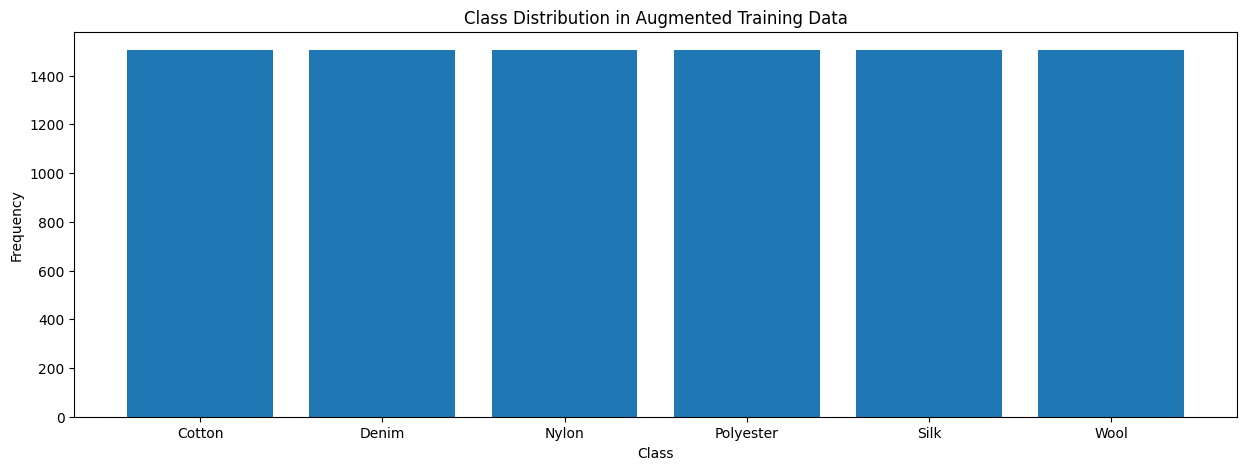

In [ ]:

fig, ax = plt.subplots(figsize=(15, 5))

values, counts = np.unique(combined_df.Label.values.tolist(), return_counts=True)
ax.bar(values, counts)
ax.set_title("Class Distribution in Augmented Training Data")
ax.set_xlabel("Class")
ax.set_ylabel("Frequency")
plt.show()

In [ ]:
train_df_augmented = combined_df

In [ ]:
# Save the DataFrame to a CSV file in your Google Drive
train_df_augmented.to_csv('/content/drive/MyDrive/Gr3_Fabric_Classification/data/train_df_augmented.csv', index=False)

#### Data augmentation on the validation set

In [ ]:
validation_df = pd.read_csv('/content/drive/MyDrive/Gr3_Fabric_Classification/data/prepare/validation.csv')
print(validation_df)

                                              Filepath      Label
0    /content/drive/MyDrive/Gr3_Fabric_Classificati...      Nylon
1    /content/drive/MyDrive/Gr3_Fabric_Classificati...     Cotton
2    /content/drive/MyDrive/Gr3_Fabric_Classificati...     Cotton
3    /content/drive/MyDrive/Gr3_Fabric_Classificati...     Cotton
4    /content/drive/MyDrive/Gr3_Fabric_Classificati...     Cotton
..                                                 ...        ...
746  /content/drive/MyDrive/Gr3_Fabric_Classificati...       Silk
747  /content/drive/MyDrive/Gr3_Fabric_Classificati...     Cotton
748  /content/drive/MyDrive/Gr3_Fabric_Classificati...     Cotton
749  /content/drive/MyDrive/Gr3_Fabric_Classificati...  Polyester
750  /content/drive/MyDrive/Gr3_Fabric_Classificati...     Cotton

[751 rows x 2 columns]


In [ ]:
max_label = validation_df['Label'].value_counts().idxmax()
max_count = validation_df['Label'].value_counts().max()
print("max_label:", max_label)
print("max_count:", max_count)


max_label: Cotton
max_count: 376


In [ ]:
target_count = max_count
target_count

376

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TARGET_DIRECTORY = "/content/drive/MyDrive/Gr3_Fabric_Classification/data/augmented/validation_augmented/"
os.makedirs(TARGET_DIRECTORY, exist_ok=True)

# Set up ImageDataGenerator
datagen_lv1 = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_lv2 = ImageDataGenerator(
    rotation_range=70,
    width_shift_range=0.15,
    height_shift_range=0.25,
    shear_range=0.1,
    zoom_range=0.2,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen_lv3 = ImageDataGenerator(
    rotation_range=10,
    shear_range=0.15,
    zoom_range=[0.5, 1.0],
    brightness_range=[0.2, 1.0],
    vertical_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Hàm đếm số lượng ảnh hiện có trong tập xác thực
def count_current_images_validation():
    counts = {}
    for label in validation_df['Label'].unique():  # Thay đổi từ train_df thành validation_df
        label_dir = os.path.join(TARGET_DIRECTORY, label, 'validation')  # Giả sử thư mục validation là 'validation'
        current_count = len(os.listdir(label_dir)) if os.path.exists(label_dir) else 0
        counts[label] = current_count
    return counts


In [ ]:
counts

{}

In [ ]:
# Chỉ định danh sách nhãn cần tăng cường
target_labels = ["Denim", "Nylon", "Polyester", "Silk", "Wool"]

In [ ]:
TARGET_DIRECTORY

'/content/drive/MyDrive/Gr3_Fabric_Classification/data/augmented/validation_augmented/'

In [ ]:
# Tạo ảnh cho lv1
for label in target_labels:
    label_lv1_dir = os.path.join(TARGET_DIRECTORY, label, 'lv1')
    os.makedirs(label_lv1_dir, exist_ok=True)

    temp_df = validation_df[validation_df['Label'] == label]
    data_gen_lv1 = datagen_lv1.flow_from_dataframe(
        dataframe=temp_df,
        save_to_dir=label_lv1_dir,
        x_col='Filepath',
        y_col='Label',
        target_size=(400, 400),
        interpolation='bicubic',
        color_mode='rgb',
        class_mode='categorical',
        batch_size=len(temp_df),
        seed=42,
    )

    print(f"Generating {len(temp_df)} augmented images for {label} at lv1")
    next(data_gen_lv1)  # Sinh một batch ảnh và lưu lại


Found 104 validated image filenames belonging to 1 classes.
Generating 104 augmented images for Denim at lv1
Found 36 validated image filenames belonging to 1 classes.
Generating 36 augmented images for Nylon at lv1
Found 145 validated image filenames belonging to 1 classes.
Generating 145 augmented images for Polyester at lv1
Found 32 validated image filenames belonging to 1 classes.
Generating 32 augmented images for Silk at lv1
Found 58 validated image filenames belonging to 1 classes.
Generating 58 augmented images for Wool at lv1


In [ ]:
# Hàm đếm số lượng ảnh hiện có
def count_lv2_images():
    lv2_counts = {}
    for label in train_df['Label'].unique():
        label_dir = os.path.join(TARGET_DIRECTORY, label, 'lv2')
        count_2 = len(os.listdir(label_dir)) if os.path.exists(label_dir) else 0
        lv2_counts[label] = count_2
    return lv2_counts

# Gọi hàm để lấy số lượng ảnh ở lv2
lv2_counts = count_lv2_images()

# Kiểm tra kết quả
print("Số lượng ảnh ở lv2 cho mỗi nhãn:")
for label, count in lv2_counts.items():
    print(f"{label}: {count}")


In [ ]:
# Hàm đếm số lượng ảnh hiện có
def count_lv1_images_validation():
    lv1_counts = {}
    for label in validation_df['Label'].unique():
        label_dir = os.path.join(TARGET_DIRECTORY, label, 'lv1')
        count_1 = len(os.listdir(label_dir)) if os.path.exists(label_dir) else 0
        lv1_counts[label] = count_1
    return lv1_counts

# Gọi hàm để lấy số lượng ảnh ở lv2
lv1_counts = count_lv1_images_validation()

# Kiểm tra kết quả
print("Số lượng ảnh ở lv1 cho mỗi nhãn:")
for label, count in lv1_counts.items():
    print(f"{label}: {count}")


Số lượng ảnh ở lv1 cho mỗi nhãn:
Nylon: 36
Cotton: 0
Denim: 104
Wool: 58
Polyester: 145
Silk: 32


In [ ]:
for label in target_labels:
    # Tính số lượng cần tạo cho lv2
    total_current = lv1_counts[label] + len(validation_df[validation_df['Label'] == label])
    needed_lv2 = (target_count - total_current) // 2

    if needed_lv2 > 0:
        # Tạo thư mục cho lv2
        label_lv2_dir = os.path.join(TARGET_DIRECTORY, label, 'lv2')
        os.makedirs(label_lv2_dir, exist_ok=True)

        # Tạo ảnh cho lv2
        print(f"Generating {needed_lv2} augmented images for {label} at lv2")
        data_gen_lv2 = datagen_lv2.flow_from_dataframe(
            dataframe=validation_df[validation_df['Label'] == label],
            save_to_dir=label_lv2_dir,
            x_col='Filepath',
            y_col='Label',
            target_size=(400, 400),
            interpolation='bicubic',
            color_mode='rgb',
            class_mode='categorical',
            batch_size=1,  # Đặt kích thước batch thành 1
            seed=42,
        )

        generated_count = 0
        while generated_count < needed_lv2:
            # Tạo một batch ảnh
            next_batch = next(data_gen_lv2)
            generated_count += len(next_batch[0])  # Cập nhật bằng số ảnh đã tạo

            # In ra số lượng ảnh đã tạo
            print(f"Generated {generated_count} images for {label} at lv2.")


In [ ]:
# Hàm đếm số lượng ảnh hiện có
def count_lv2_images_validation():
    lv2_counts = {}
    for label in validation_df['Label'].unique():
        label_dir = os.path.join(TARGET_DIRECTORY, label, 'lv2')
        count_2 = len(os.listdir(label_dir)) if os.path.exists(label_dir) else 0
        lv2_counts[label] = count_2
    return lv2_counts

# Gọi hàm để lấy số lượng ảnh ở lv2
lv2_counts = count_lv2_images_validation()

# Kiểm tra kết quả
print("Số lượng ảnh ở lv2 cho mỗi nhãn:")
for label, count in lv2_counts.items():
    print(f"{label}: {count}")


Số lượng ảnh ở lv2 cho mỗi nhãn:
Nylon: 152
Cotton: 0
Denim: 84
Wool: 130
Polyester: 43
Silk: 156


In [ ]:
for label in target_labels:
    total_after_lv2 = lv1_counts[label] + lv2_counts[label] + len(validation_df[validation_df['Label'] == label])
    needed_lv3 = target_count - total_after_lv2

    if needed_lv3 > 0:
        # Tạo thư mục cho lv2
        label_lv3_dir = os.path.join(TARGET_DIRECTORY, label, 'lv3')
        os.makedirs(label_lv3_dir, exist_ok=True)

        # Tạo ảnh cho lv2
        print(f"Generating {needed_lv3} augmented images for {label} at lv3")
        data_gen_lv3 = datagen_lv3.flow_from_dataframe(
            dataframe=validation_df[validation_df['Label'] == label],
            save_to_dir=label_lv3_dir,
            x_col='Filepath',
            y_col='Label',
            target_size=(400, 400),
            interpolation='bicubic',
            color_mode='rgb',
            class_mode='categorical',
            batch_size=1,  # Đặt kích thước batch thành 1
            seed=42,
        )

        generated_count = 0
        while generated_count < needed_lv3:
            # Tạo một batch ảnh
            next_batch = next(data_gen_lv3)
            generated_count += len(next_batch[0])  # Cập nhật bằng số ảnh đã tạo

            # In ra số lượng ảnh đã tạo
            print(f"Generated {generated_count} images for {label} at lv3.")



In [ ]:

def count_images_in_levels(directory):

  image_counts = {}
  for label in os.listdir(directory):
    label_dir = os.path.join(directory, label)
    if os.path.isdir(label_dir):
      image_counts[label] = {}
      for level in ['lv1', 'lv2', 'lv3']:
        level_dir = os.path.join(label_dir, level)
        if os.path.isdir(level_dir):
          image_counts[label][level] = len(os.listdir(level_dir))
        else:
          image_counts[label][level] = 0
  return image_counts


# Đường dẫn đến thư mục chứa ảnh đã tăng cường
augmented_validation_dir = "/content/drive/MyDrive/Gr3_Fabric_Classification/data/augmented/validation_augmented"

# Đếm số lượng ảnh trong mỗi level
image_counts_by_level = count_images_in_levels(augmented_validation_dir)

# In kết quả
for label, level_counts in image_counts_by_level.items():
  print(f"Label: {label}")
  for level, count in level_counts.items():
    print(f"  {level}: {count} images")

Label: Denim
  lv1: 104 images
  lv2: 84 images
  lv3: 84 images
Label: Nylon
  lv1: 36 images
  lv2: 152 images
  lv3: 152 images
Label: Polyester
  lv1: 145 images
  lv2: 43 images
  lv3: 43 images
Label: Silk
  lv1: 32 images
  lv2: 156 images
  lv3: 156 images
Label: Wool
  lv1: 58 images
  lv2: 130 images
  lv3: 130 images


In [ ]:

def create_dataframe_from_augmented_data(directory):

  filepaths = []
  labels = []

  for label in os.listdir(directory):
    label_dir = os.path.join(directory, label)
    if os.path.isdir(label_dir):
      for level in ['lv1', 'lv2', 'lv3']:
          level_dir = os.path.join(label_dir, level)
          if os.path.isdir(level_dir):
            for filename in os.listdir(level_dir):
              if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                filepaths.append(os.path.join(level_dir, filename))
                labels.append(label)

  df = pd.DataFrame({'Filepath': filepaths, 'Label': labels})
  return df

# Đường dẫn đến thư mục chứa ảnh đã tăng cường
directory = '/content/drive/MyDrive/Gr3_Fabric_Classification/data/augmented/validation_augmented'

# Tạo DataFrame từ dữ liệu tăng cường
validation_augmented_df = create_dataframe_from_augmented_data(directory)

# In DataFrame
print(validation_augmented_df)

                                               Filepath  Label
0     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Denim
1     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Denim
2     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Denim
3     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Denim
4     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Denim
...                                                 ...    ...
1500  /content/drive/MyDrive/Gr3_Fabric_Classificati...   Wool
1501  /content/drive/MyDrive/Gr3_Fabric_Classificati...   Wool
1502  /content/drive/MyDrive/Gr3_Fabric_Classificati...   Wool
1503  /content/drive/MyDrive/Gr3_Fabric_Classificati...   Wool
1504  /content/drive/MyDrive/Gr3_Fabric_Classificati...   Wool

[1505 rows x 2 columns]


In [ ]:

validation_combined_df = pd.concat([validation_df, validation_augmented_df], ignore_index=True)
print(validation_combined_df)

                                               Filepath   Label
0     /content/drive/MyDrive/Gr3_Fabric_Classificati...   Nylon
1     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Cotton
2     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Cotton
3     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Cotton
4     /content/drive/MyDrive/Gr3_Fabric_Classificati...  Cotton
...                                                 ...     ...
2251  /content/drive/MyDrive/Gr3_Fabric_Classificati...    Wool
2252  /content/drive/MyDrive/Gr3_Fabric_Classificati...    Wool
2253  /content/drive/MyDrive/Gr3_Fabric_Classificati...    Wool
2254  /content/drive/MyDrive/Gr3_Fabric_Classificati...    Wool
2255  /content/drive/MyDrive/Gr3_Fabric_Classificati...    Wool

[2256 rows x 2 columns]


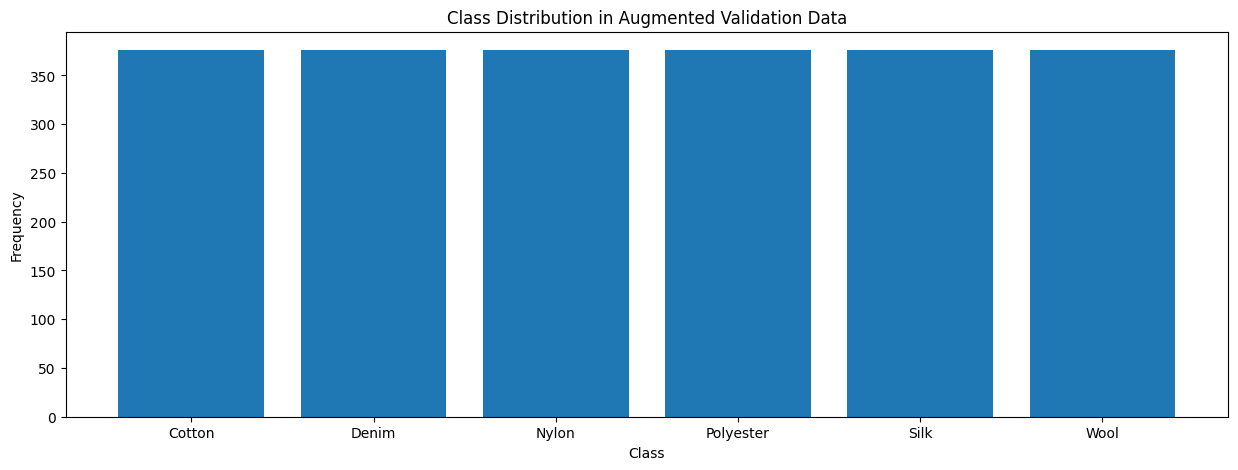

In [ ]:

fig, ax = plt.subplots(figsize=(15, 5))

values, counts = np.unique(validation_combined_df.Label.values.tolist(), return_counts=True)
ax.bar(values, counts)
ax.set_title("Class Distribution in Augmented Validation Data")
ax.set_xlabel("Class")
ax.set_ylabel("Frequency")
plt.show()

In [ ]:
validation_combined_df.to_csv('/content/drive/MyDrive/Gr3_Fabric_Classification/data/validation_combined_df.csv', index=False)

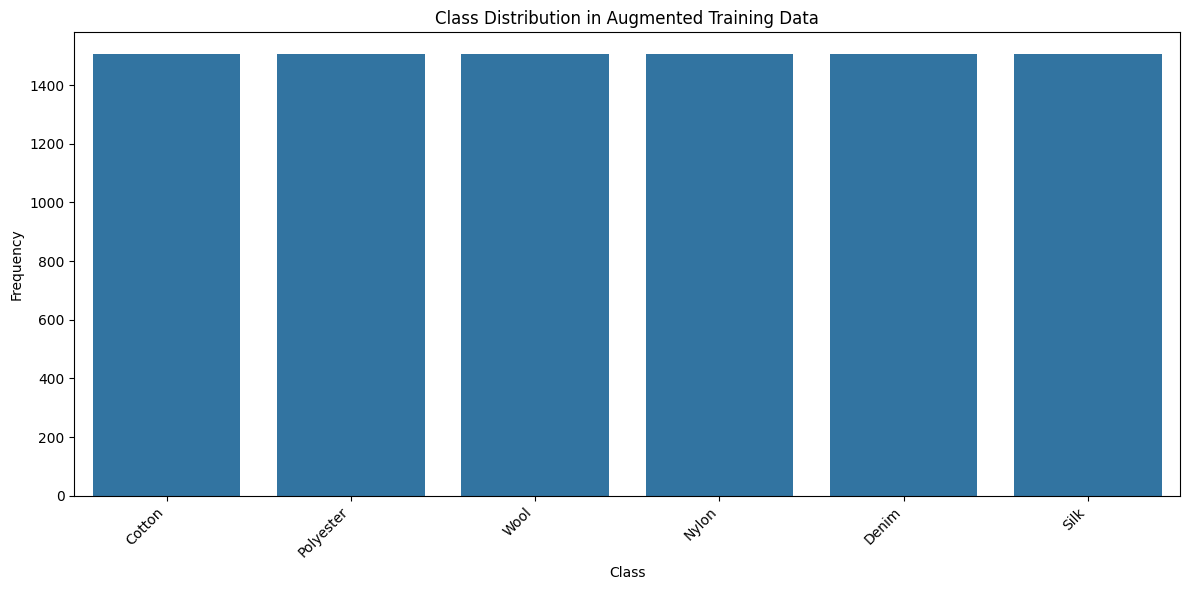

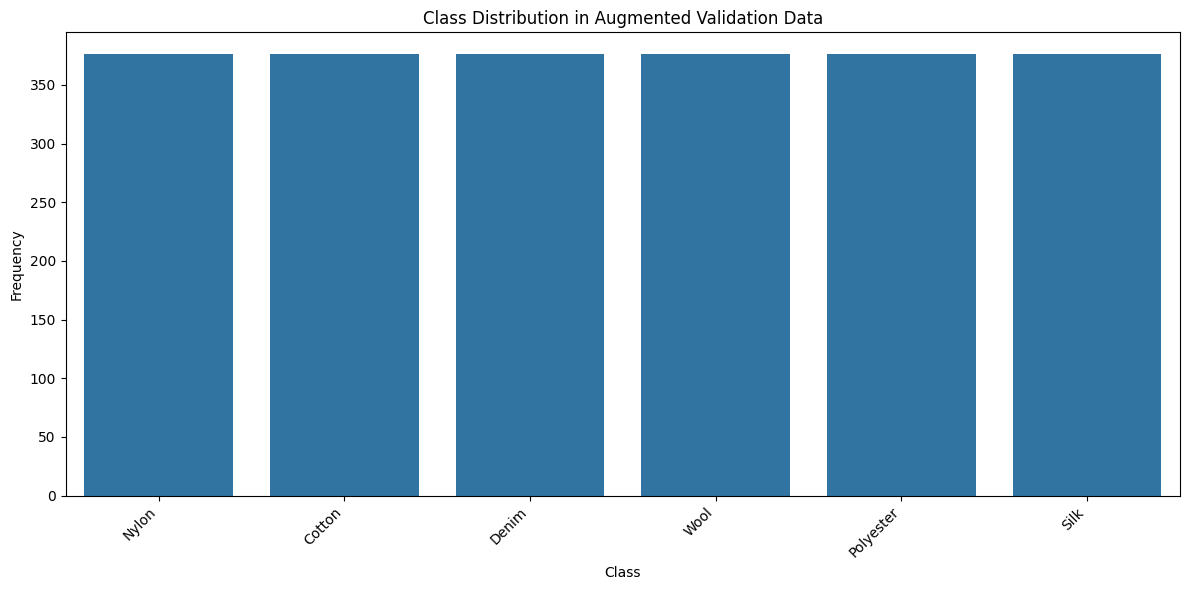

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='Label', data=train_df_augmented)
plt.title('Class Distribution in Augmented Training Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the distribution of classes in validation_combined_df
plt.figure(figsize=(12, 6))
sns.countplot(x='Label', data=validation_combined_df)
plt.title('Class Distribution in Augmented Validation Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()